In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
col_names=['id','ccf','age','sex','painloc','painexer','relrest','pncaden','cp','trestbps','htn','chol','smoke','cigs','years','fbs','dm','famhist','restecg','ekgmo','ekgday','ekgyr','dig','prop','nitr','pro','diuretic','proto','thaldur','thaltime','met','thalach','thalrest','tpeakbps','tpeakbpd','dummy','trestbpd','exang','xhypo','oldpeak','slope','rldv5','rldv5e','ca','restckm','exerckm','restef','restwm','exeref','exerwm','thal','thalsev','thalpul','earlobe','cmo','cday','cyr','num','lmt','ladprox','laddist','diag','cxmain','ramus','om1','om2','rcaprox','rcadist','lvx1','lvx2','lvx3','lvx4','lvf','cathef','junk','name']
df = pd.read_csv('heart_data.csv', header=None, names=col_names)

In [3]:
df

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,...,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name
0,1,0,63,1,-9,-9,-9,-9,1,145,...,1,1,1,1,1,1,1,-9,-9,name
1,2,0,67,1,-9,-9,-9,-9,4,160,...,1,1,1,1,1,1,1,-9,-9,name
2,3,0,67,1,-9,-9,-9,-9,4,120,...,2,2,1,1,1,7,3,-9,-9,name
3,4,0,37,1,-9,-9,-9,-9,3,130,...,1,1,1,1,1,1,1,-9,-9,name
4,6,0,41,0,-9,-9,-9,-9,2,130,...,1,1,1,1,1,1,1,-9,-9,name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,294,0,39,0,-9,-9,-9,-9,3,138,...,1,1,1,1,1,1,2,-9,-9,name
278,295,0,57,1,-9,-9,-9,-9,2,154,...,1,1,1,1,1,1,1,-9,-9,name
279,296,0,58,0,-9,-9,-9,-9,4,130,...,1,1,1,1,1,1,1,-9,-9,name
280,297,0,57,1,-9,-9,-9,-9,4,110,...,1,2,1,1,1,1,1,-9,-9,name


In [4]:
df.dtypes

id          int64
ccf         int64
age         int64
sex         int64
painloc     int64
            ...  
lvx4        int64
lvf         int64
cathef      int64
junk        int64
name       object
Length: 76, dtype: object

In [5]:
graph_selection=['age','sex','cp','trestbps', 'htn','chol','cigs','years','fbs','famhist','restecg','ekgmo','ekgday','ekgyr','dig','nitr','pro','diuretic','proto','thaldur','thaltime','met','thalach','thalrest', 'tpeakbps', 'tpeakbpd', 'dummy','trestbpd', 'exang','xhypo','oldpeak','slope','rldv5e','ca','thal','cmo','cday','cyr','lmt', 'ladprox','laddist','cxmain','om1','rcaprox','rcadist','lvx3','lvx4','lvf']

In [7]:
# Check for missing values
missing_values = df.isnull().sum()

# Statistical summary of the dataset
statistical_summary = df.describe()

missing_values, statistical_summary


(id         0
 ccf        0
 age        0
 sex        0
 painloc    0
           ..
 lvx4       0
 lvf        0
 cathef     0
 junk       0
 name       0
 Length: 76, dtype: int64,
                id    ccf         age         sex  painloc  painexer  relrest  \
 count  282.000000  282.0  282.000000  282.000000    282.0     282.0    282.0   
 mean   151.517730    0.0   54.411348    0.677305     -9.0      -9.0     -9.0   
 std     87.131234    0.0    9.053083    0.468338      0.0       0.0      0.0   
 min      1.000000    0.0   29.000000    0.000000     -9.0      -9.0     -9.0   
 25%     75.250000    0.0   48.000000    0.000000     -9.0      -9.0     -9.0   
 50%    151.500000    0.0   55.000000    1.000000     -9.0      -9.0     -9.0   
 75%    227.750000    0.0   61.000000    1.000000     -9.0      -9.0     -9.0   
 max    298.000000    0.0   77.000000    1.000000     -9.0      -9.0     -9.0   
 
        pncaden          cp    trestbps  ...    om2     rcaprox     rcadist  \
 count   

C:\Users\Abhinav Mishra\AppData\Local\Temp\ipykernel_26736\3863825168.py:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


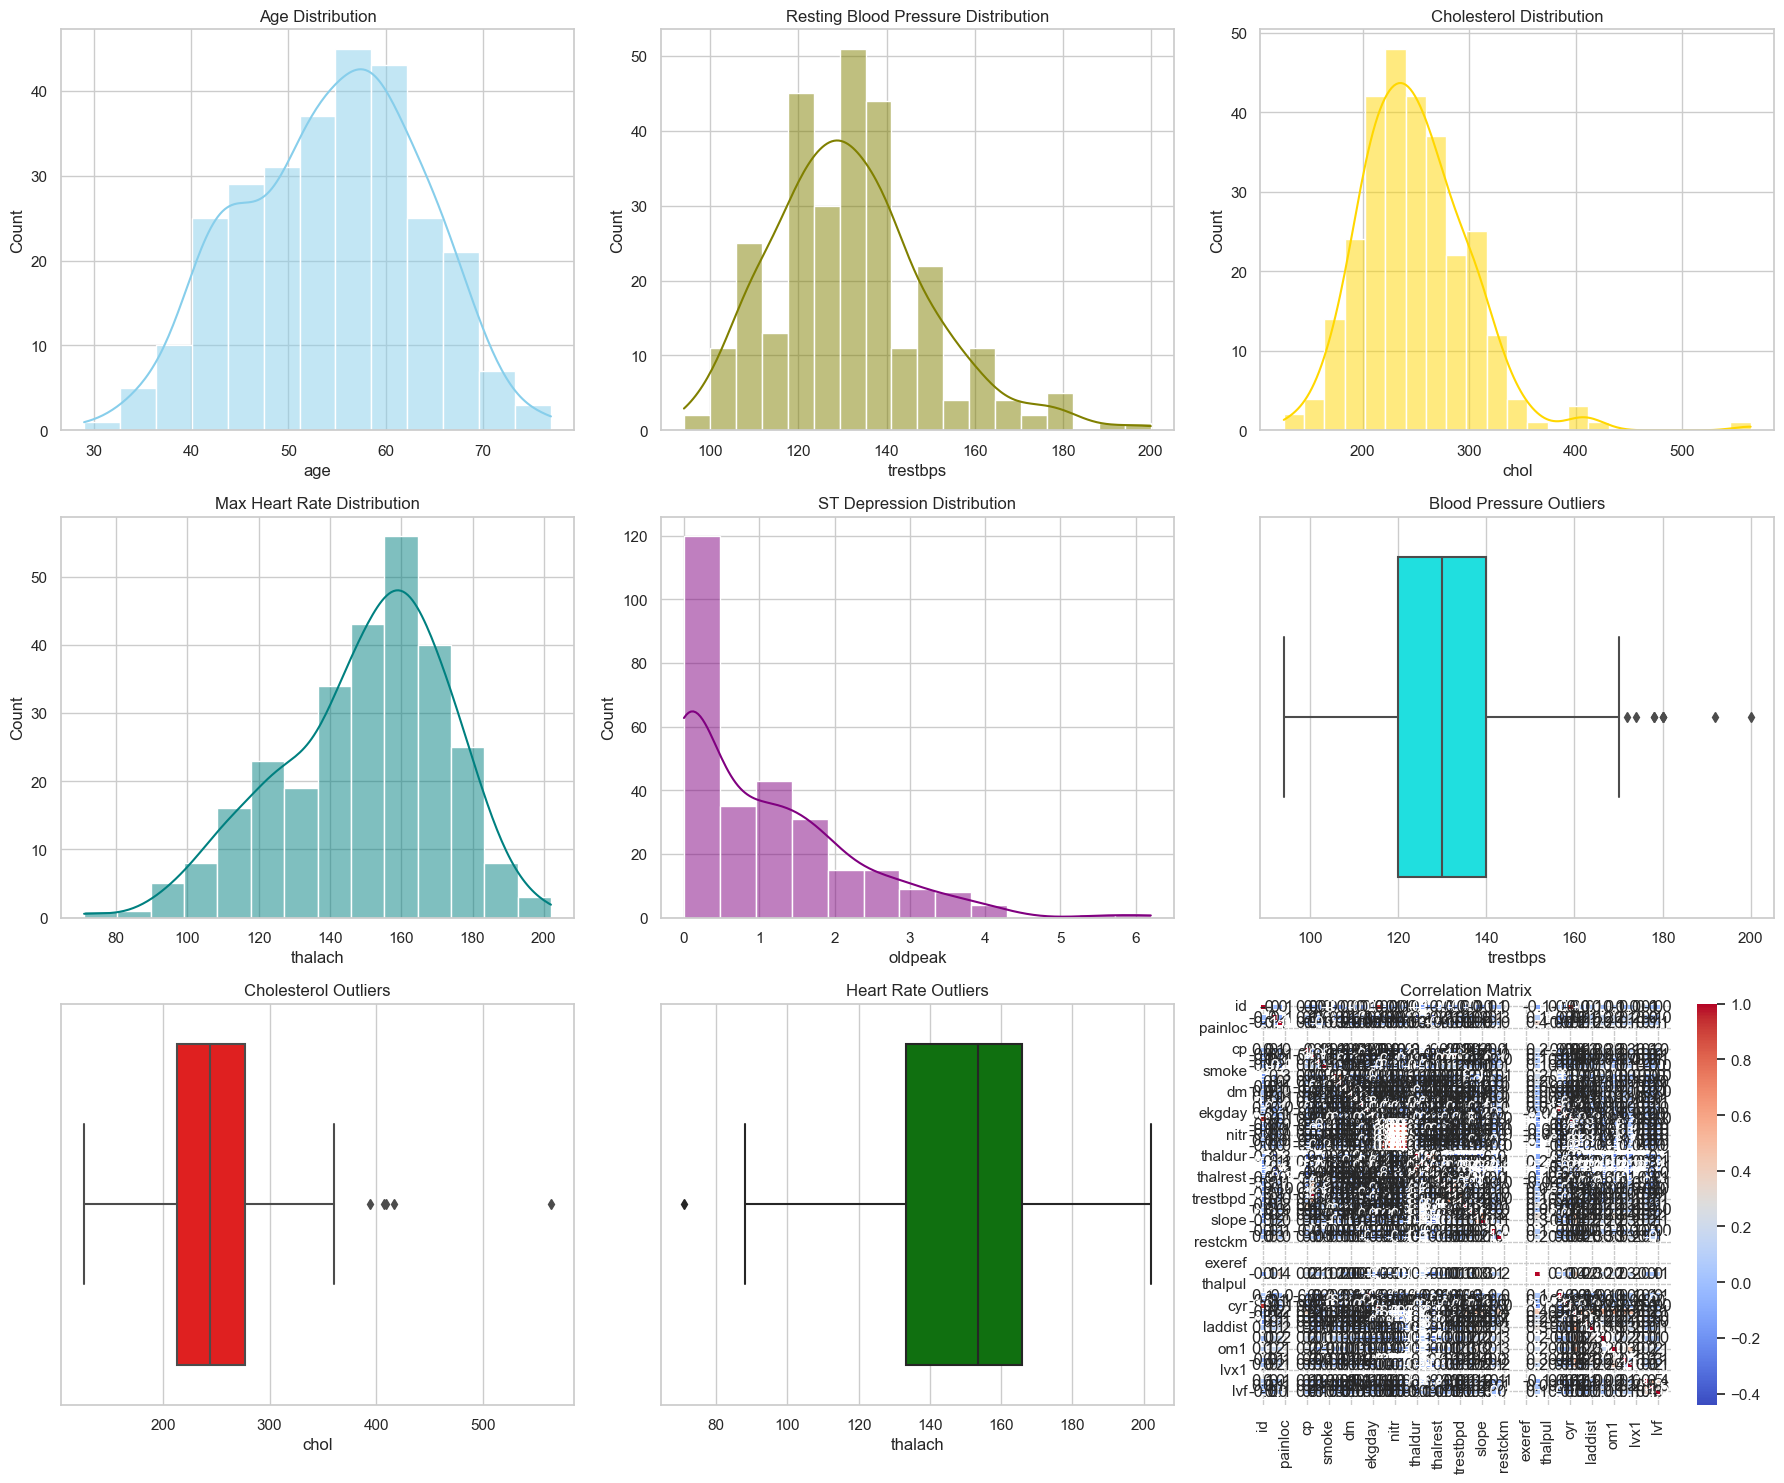

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure to host the plots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Histograms for continuous variables
sns.histplot(df['age'], kde=True, ax=axes[0, 0], color='skyblue').set_title('Age Distribution')
sns.histplot(df['trestbps'], kde=True, ax=axes[0, 1], color='olive').set_title('Resting Blood Pressure Distribution')
sns.histplot(df['chol'], kde=True, ax=axes[0, 2], color='gold').set_title('Cholesterol Distribution')
sns.histplot(df['thalach'], kde=True, ax=axes[1, 0], color='teal').set_title('Max Heart Rate Distribution')
sns.histplot(df['oldpeak'], kde=True, ax=axes[1, 1], color='purple').set_title('ST Depression Distribution')

# Box plots to check for outliers
sns.boxplot(x='trestbps', data=df, ax=axes[1, 2], color='cyan').set_title('Blood Pressure Outliers')
sns.boxplot(x='chol', data=df, ax=axes[2, 0], color='red').set_title('Cholesterol Outliers')
sns.boxplot(x='thalach', data=df, ax=axes[2, 1], color='green').set_title('Heart Rate Outliers')

# Correlation matrix heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".1f", linewidths=.5, ax=axes[2, 2], cmap='coolwarm').set_title('Correlation Matrix')

plt.tight_layout()
plt.show()


In [9]:
X = df[graph_selection].values
Y = df['num'].values

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=-9, strategy='median')
imputer = imputer.fit(X)
X = imputer.transform(X)

In [11]:
X = np.append(arr=np.ones((282, 1)).astype(int), values=X, axis=1)

In [12]:
X

array([[ 1., 63.,  1., ...,  1.,  1.,  1.],
       [ 1., 67.,  1., ...,  1.,  1.,  1.],
       [ 1., 67.,  1., ...,  1.,  7.,  3.],
       ...,
       [ 1., 58.,  0., ...,  1.,  1.,  1.],
       [ 1., 57.,  1., ...,  1.,  1.,  1.],
       [ 1., 47.,  1., ...,  1.,  1.,  1.]])

In [13]:
from statsmodels.regression.linear_model import OLS

def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    print(regressor_OLS.summary())
    return x

In [14]:
SL = 0.01
X_opt = X
X_Modeled = backwardElimination(X_opt, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     431.2
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          2.14e-155
Time:                        20:21:03   Log-Likelihood:                -72.514
No. Observations:                 282   AIC:                             165.0
Df Residuals:                     272   BIC:                             201.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1583      0.066    -47.508      0.0

In [15]:
df3 = pd.DataFrame(data=X_Modeled, columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
df3

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.0,1.0,0.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0
2,1.0,1.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
3,1.0,1.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
277,1.0,1.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
278,1.0,1.0,0.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
279,1.0,1.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
280,1.0,1.0,1.0,7.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0


In [16]:
df4 = df3.drop('x0', axis=1)
df4

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.0,0.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0
2,1.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
3,1.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
277,1.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
278,1.0,0.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
279,1.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
280,1.0,1.0,7.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df4, Y, random_state=42, test_size=0.2)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
k_nn_classifier = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=1, algorithm='ball_tree', leaf_size=30)
k_nn_classifier.fit(X_train, Y_train)
k_nn_y_pred = k_nn_classifier.predict(X_test)                    #predicted y values for X_train\n",
from sklearn import metrics
k_nn_acc = metrics.accuracy_score(Y_test, k_nn_y_pred)

In [25]:
from sklearn.metrics import classification_report
# Make predictions on both the training and test sets
y_pred_train = k_nn_classifier.predict(X_train)
y_pred_test = k_nn_classifier.predict(X_test)

# Print the classification report for both training and test sets
print("Classification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test))


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00         7

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       0.70      0.78      0.74         9
           2       0.60      0.60      0.60         5
           3       0.80      0.89      0.84         9
           4       1.00      0.20      0.33         5

    accuracy                           0.84        57
   macro avg       0.81      0.69      0.70        57
w

In [27]:
from sklearn.tree import DecisionTreeClassifier;
dt = DecisionTreeClassifier(criterion='gini', splitter='best')
dt.fit(X_train, Y_train)
dt_y_pred = dt.predict(X_test)
dt_acc = metrics.accuracy_score(Y_test, dt_y_pred)

In [28]:
from sklearn.metrics import classification_report
# Make predictions on both the training and test sets
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

# Print the classification report for both training and test sets
print("Classification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test))


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00         7

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00         5
           3       0.90      1.00      0.95         9
           4       1.00      0.60      0.75         5

    accuracy                           0.96        57
   macro avg       0.96      0.92      0.93        57
w

In [30]:
from sklearn.ensemble import RandomForestClassifier;
rf = RandomForestClassifier(n_estimators=10, criterion='gini')
rf.fit(X_train, Y_train)
rf_y_pred = rf.predict(X_test)
rf_acc = metrics.accuracy_score(Y_test, rf_y_pred)

In [31]:
from sklearn.metrics import classification_report
# Make predictions on both the training and test sets
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Print the classification report for both training and test sets
print("Classification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test))


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00         7

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.75      1.00      0.86         9
           2       0.43      0.60      0.50         5
           3       0.78      0.78      0.78         9
           4       0.00      0.00      0.00         5

    accuracy                           0.84        57
   macro avg       0.59      0.68      0.63        57
w

C:\Users\Abhinav Mishra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhinav Mishra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhinav Mishra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(Y_test, gb_pred)

In [33]:
from sklearn.metrics import classification_report
# Make predictions on both the training and test sets
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)

# Print the classification report for both training and test sets
print("Classification Report for Training Set:")
print(classification_report(y_train, y_pred_train))

print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_test))


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00         7

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         5

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
w

In [34]:
import pickle

filename1 = 'model1_chd.sav'
filename2 = 'model2_chd.sav'
filename3 = 'model3_chd.sav'

pickle.dump(rf, open(filename1, 'wb'))
pickle.dump(gb, open(filename2, 'wb'))
pickle.dump(dt, open(filename3, 'wb'))